In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
from IPython.display import Image

Reading the data from an excel file

In [2]:
df = pd.read_csv (r'D:\school\Semesters\Fall_2021\Mech_490\Data_Analysis\Raw_data\Dummy_test3_100bpm\Raw Data.csv')

Making a copy of the dataframe to secure original data

In [3]:
df_1=df.copy()
df_cname='Linear Acceleration z (m/s^2)'
df_1=df_1.iloc[:,[0,3]]


First look of the data

In [4]:
df_1

,Time (s),Linear Acceleration z (m/s^2)
0,0.105185,-0.951100
1,0.110412,-0.792633
2,0.115638,-0.621725
3,0.120865,-0.558914
4,0.126091,-0.514235
...,...,...
6807,34.988141,0.313409
6808,34.993265,0.195917
6809,34.998389,-0.041376
6810,35.003513,-0.365469


Making "Time" as the index of the dataframe

In [5]:
df_1=pd.concat([df_1['Time (s)'],df_1[f'{df_cname}']],axis=1)
df_1.set_index('Time (s)', inplace=True)

# Data exploration

<AxesSubplot:xlabel='Time (s)'>

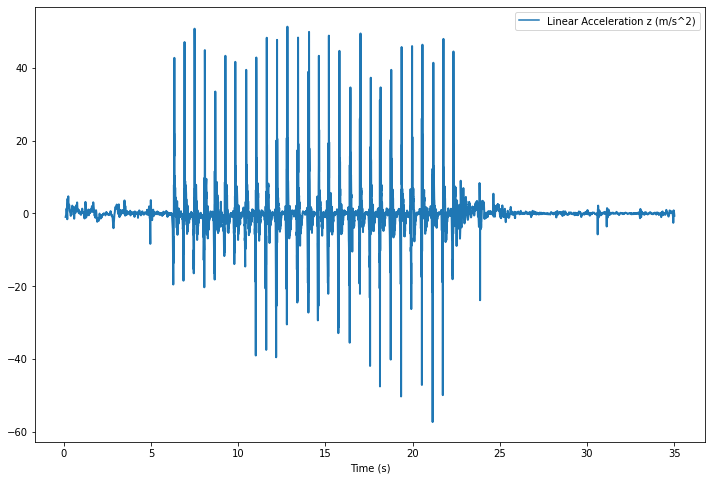

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_1,palette='tab10',linewidth=2.0)

at average sampling interval was around 0.0051039
sample rate in frequency of sampling interval is 195.9270

In [7]:
sample_rate=195.92706810

Analyzing the a sample length of 2 seconds

In [8]:
df_1=df_1.loc[8:10]
df_1

,Linear Acceleration z (m/s^2)
Time (s),
8.004730,-6.975068
8.009854,-7.093862
8.014978,-7.274635
8.020102,-12.780315
8.025226,-9.665180
...,...
9.977493,-2.677005
9.982617,1.278849
9.987741,-2.979518


Plot from 8 seconds to 10 seconds

<AxesSubplot:xlabel='Time (s)'>

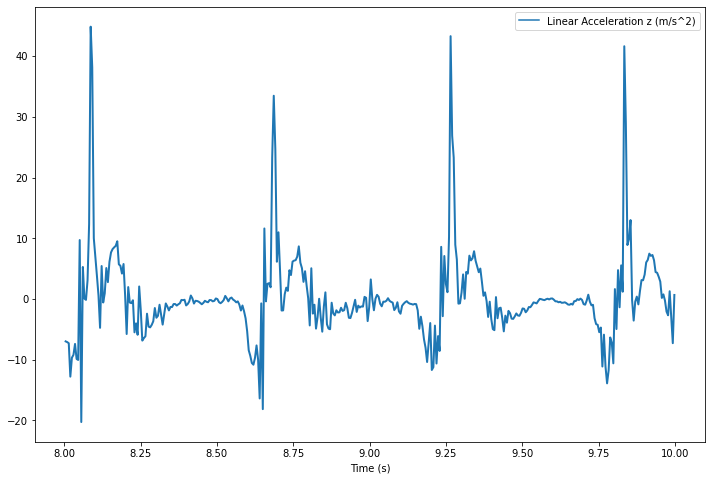

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_1,palette='tab10',linewidth=2.0)

# Data Filtering

Filtering the data with Butterworth low-pass filter
With a cut-off frequency of 15hz

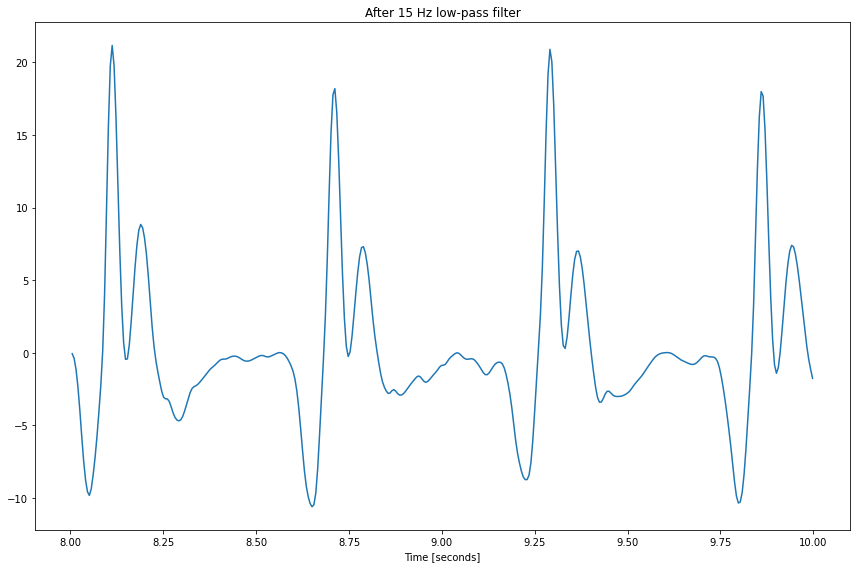

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sos = signal.butter(3, 15, 'low', fs=sample_rate, output='sos')
filtered = signal.sosfilt(sos, df_1.iloc[:,0].values)
ax.plot(df_1.index.values, filtered)
ax.set_title('After 15 Hz low-pass filter')

ax.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Transforming array into a dataframe

In [11]:
df_1_filtered=pd.DataFrame({'Time (s)':df_1.index.values,'Linear Acceleration z (m/s^2)':filtered})


# Fast Fourier Transform

In [12]:
N=len(df_1_filtered) #number of samples

sample_space=1/sample_rate #sample interval
df_2=df_1_filtered
yf = fft(df_2.iloc[:,1].values)
xf = fftfreq(N, sample_space)[:N//2]
yf=2.0/N * np.abs(yf[:N//2])

In [13]:
df_fft = pd.DataFrame({'xf':xf, 'yf':yf})
df_fft.set_index('xf',inplace=True)

Frequencies

<AxesSubplot:xlabel='xf'>

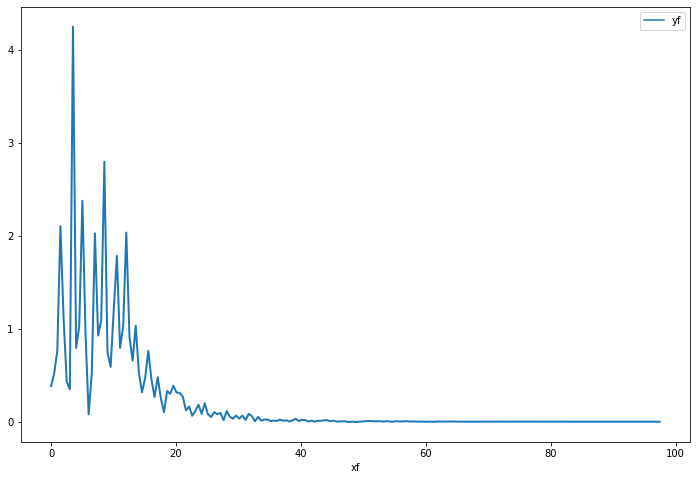

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_fft,palette='tab10',linewidth=2.0)

# Checking the values for peak

In [15]:
x_peaks,_=signal.find_peaks(yf,height=1)
_

{'peak_heights': array([2.10564801, 4.25006333, 2.38003734, 2.02977164, 2.79899824,
        1.787958  , 2.03797968, 1.03561571])}

In [16]:
df_peaks=pd.DataFrame({'x_peaks':x_peaks,'peak_heights':_['peak_heights']})
df_peaks

,x_peaks,peak_heights
0,3,2.105648
1,7,4.250063
2,10,2.380037
3,14,2.029772
4,17,2.798998
5,21,1.787958
6,24,2.037980
7,27,1.035616


# Calculate position on Excel

In [17]:
df_s = pd.read_excel(r'D:\school\Semesters\Fall_2021\Mech_490\Data_Analysis\Methods\Spectral analysis\Spectral analysis Time and Displacement.xlsx')

In [18]:
df_s

,t,sum
0,8.004730,-30.894931
1,8.009854,-29.148612
2,8.014978,-27.269625
3,8.020102,-25.276959
4,8.025226,-23.190389
...,...,...
385,9.977493,-35.691423
386,9.982617,-34.536850
387,9.987741,-33.193460
388,9.992865,-31.675474


In [19]:
df_s=pd.concat([df_s['t'],df_s['sum']],axis=1)
df_s.set_index('t', inplace=True)

<AxesSubplot:xlabel='t'>

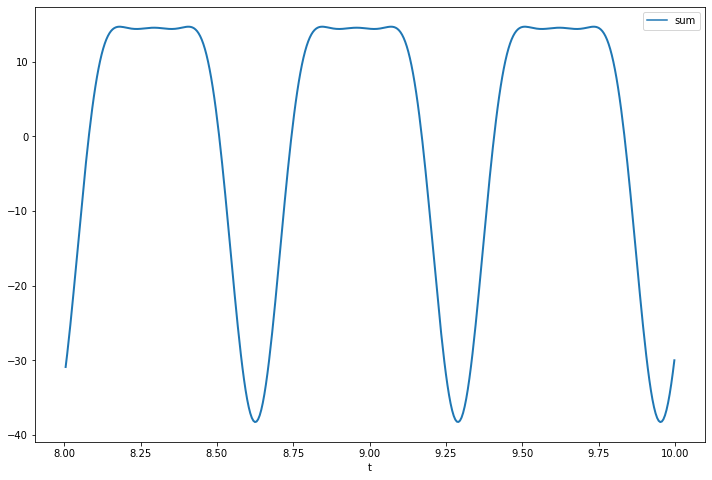

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_s,palette='tab10',linewidth=2.0)